<a href="https://colab.research.google.com/github/GeorgiaAAAl/GeorgiaAAAl/blob/main/BOX_PLOT_QUE_A_THATI_PEDIU_SEM_LEGENDA_DE_TITULO%2C_MUDANDO_CATEGORIA_POR_IDADE_OU_PESO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/georgia/GEORGIA.xlsx')
display(df)

,Data proc,G1 Protocol,Prontuário,Idade,CATEGORIA,PKA DAP total (Gy.cm^2)
0,2023-07-07,CARDIAC,17170622,0.070000,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,A,0.0423
...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,E,3.4800


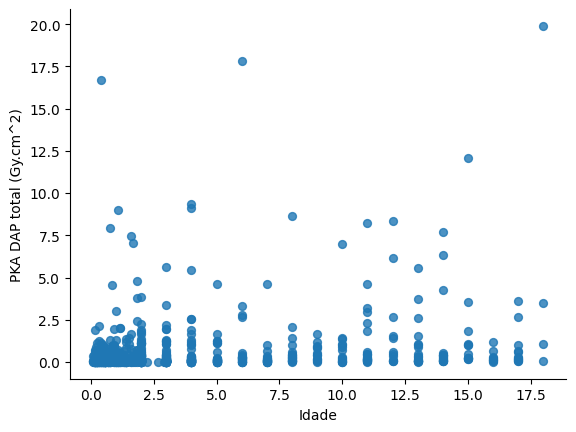

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Idade', y='PKA DAP total (Gy.cm^2)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Index(['Data proc', 'G1 Protocol', 'Prontuário', 'Idade', 'CATEGORIA',
       'PKA DAP total (Gy.cm^2)'],
      dtype='object')


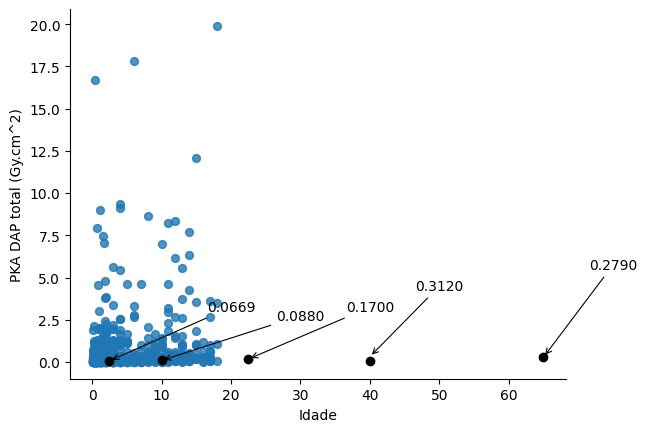

In [ ]:
from matplotlib import pyplot as plt

# Verifique o nome da coluna correta no seu DataFrame
print(df.columns) # Imprima as colunas para encontrar o nome correto
# Assumindo que o nome correto da coluna é 'Idade', altere o código:

# Criar o gráfico de dispersão com o nome da coluna corrigido
df.plot(kind='scatter', x='Idade', y='PKA DAP total (Gy.cm^2)', s=32, alpha=.8)

# Configurar para remover os eixos superiores e à direita
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar pontos pretos nos locais dos valores
plt.scatter(2.5, 0.0669, color='black', zorder=5)  # <1
plt.scatter(10, 0.0880, color='black', zorder=5)   # 1 a <5
plt.scatter(22.5, 0.1700, color='black', zorder=5) # 5 a <10
plt.scatter(40, 0.03120, color='black', zorder=5)   # 10 a <15
plt.scatter(65, 0.2790, color='black', zorder=5)    # >15
# Configurar propriedades das setas
arrow_properties = dict(facecolor='black', arrowstyle='->', lw=0.8)

# Adicionar setas mais longas e valores posicionados adequadamente
plt.annotate('0.0669', xy=(2.5, 0.0669), xytext=(20, 3.0), arrowprops=arrow_properties, ha='center')  # <5 kg
plt.annotate('0.0880', xy=(10, 0.0880), xytext=(30, 2.5), arrowprops=arrow_properties, ha='center')    # 5 a <15 kg
plt.annotate('0.1700', xy=(22.5, 0.1700), xytext=(40, 3.0), arrowprops=arrow_properties, ha='center')   # 15 a <30 kg
plt.annotate('0.3120', xy=(40, 0.3120), xytext=(50, 4.25), arrowprops=arrow_properties, ha='center')    # 30 a <50 kg
plt.annotate('0.2790', xy=(65, 0.2790), xytext=(75, 5.5), arrowprops=arrow_properties, ha='center')       # 50 a <80 kg


# Mostrar o gráfico atualizado
plt.show()


In [ ]:
categoria_cont = df['CATEGORIA'].value_counts()
categoria_cont = categoria_cont.reindex(['A', 'B', 'C', 'D', 'E'])
display(categoria_cont)

,count
CATEGORIA,
A,221
B,379
C,107
D,87
E,38


In [ ]:
categoriasestat = df.groupby('CATEGORIA')['PKA DAP total (Gy.cm^2)'].describe()
categorias_dados = categoriasestat[['min', '50%', '75%', 'max','std']]
display(categorias_dados)

,min,50%,75%,max,std
CATEGORIA,,,,,
A,0.001300,0.0669,0.2040,16.70,1.300828
B,0.000219,0.0880,0.3260,9.34,1.172407
C,0.000598,0.1700,0.4690,17.80,2.023097
D,0.004640,0.3120,1.0650,8.37,2.015320
E,0.013100,0.2790,1.0375,19.90,3.700750
